So we start by observing about 9 power outages in here in the city of Charlottesville Virginia. And we know that the number of outages per year can be model by a <i><b>Poisson</b></i> distribution with a rate parameter argument by <i><b>Lambda</i></b>. The parameter <i><b>Lambda</i></b> is drawn from a <i><b>Gamma</i></b> prior distribution, that has parameters <i><b>Alpha</i></b> and <i><b>Beta</i></b>, <i><b>Alpha</i></b> equals 7 and <i><b>Beta</i></b> equals 1 for this particular problem.

In [109]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

<b>Gamma</b> distributions are sometimes parameterized with two variables, with a probability density function of:

\begin{equation} f(\lambda, \alpha, \beta) = \frac{\beta^\alpha \lambda^{\alpha - 1} e^{-\beta\lambda}}{\Gamma(\alpha)} \end{equation}

In [118]:
def prior_proba_density(lam, alpha, beta):
    return (beta ** (alpha) * lam ** (alpha - 1) * np.exp(-beta * lam) / gamma(alpha))

The probability mass function for <b>Poisson</b> is:

\begin{equation} f(k) = exp(-\mu)\frac{\mu^k}{k!} \end{equation}

In [119]:
def likelihood_density(mu, k):
    return (mu ** (k) * np.exp(-mu) / factorial(k))

In [116]:
# Initiates
lambda_curr = 8.0
alpha = 7.0
beta = 1.0
data_val = 9

lambda_array = np.zeros(1000)

for i in range(1000):
    # Calculate current prior with pre-defined Gamma probability density distribution
    prior = prior_proba_density(lam=lambda_curr, alpha=alpha, beta=beta)
    
    # Calculate current likelihood with pre-defined Poisson probability density function
    likelihood = likelihood_density(mu=lambda_curr, k=data_val)
    
    # Get posterior with likelihood and prior calculated above
    posterior_curr = likelihood * prior

    # Sample from a proposed probability distribution of Gaussian with starting parameter Lamba which equals to 5
    lambda_proposed = np.random.normal(loc=lambda_curr, scale=0.5)
    
    # Calculate proposed prior with pre-defined Gamma probability density distribution
    prior = prior_proba_density(lam=lambda_proposed, alpha=alpha, beta=beta)
    
    # Calculate proposed likelihood with pre-defined Poisson probability density function
    likelihood = likelihood_density(mu=lambda_proposed, k=data_val)
    
    # Get posterior with likelihood and prior calculated above
    posterior_proposed = likelihood * prior

    # Compute the probability of move
    ratio = posterior_proposed / posterior_curr
    p_move = min(ratio, 1)
    random_draw = np.random.uniform(0, 1)
    if random_draw < p_move:
        lambda_curr = lambda_proposed

    lambda_array[i] = lambda_curr

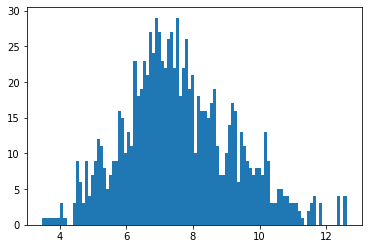

In [117]:
plt.hist(lambda_array, bins=100)
plt.show()